# **Imports**

In [1]:
# Preprocessing
import zipfile as zf
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Add your libraries here

# **Read in the data**

In [2]:
# Use the current working directory
current_dir = os.getcwd()

# Kaggle
if current_dir == "/kaggle/working":
    current_dir = "/kaggle/input/"


file_test_path = f"{current_dir}/dog-breeds-recognition/testing.csv"
file_train_path = f"{current_dir}/dog-breeds-recognition/training.csv"

print(f"Test set: {file_test_path}")
print(f"Train set: {file_train_path}")

Test set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/testing.csv
Train set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/training.csv


In [3]:
# read in train
df_train = pd.read_csv(file_train_path, header=None)
print(f"Are there any null values in Train: {df_train.isnull().values.any()}")
df_train

Are there any null values in Train: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
1,n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
2,n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
3,n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
4,n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
11996,n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
11997,n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376
11998,n02116738-African_hunting_dog\n02116738_9333.jpg,120,0.027123,0.675996,0.353758,0.421884,0.610241,0.311903,1.028679,0.632097,...,1.706490,0.396890,0.092548,1.995632,0.000000,1.191216,0.196342,0.957877,0.736384,0.034472


In [4]:
# read in test
df_test = pd.read_csv(file_test_path, header=None)
print(f"Are there any null values in Test: {df_test.isnull().values.any()}")
df_test

Are there any null values in Test: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
1,n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
2,n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
3,n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
4,n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
8576,n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
8577,n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687
8578,n02116738-African_hunting_dog\n02116738_2988.jpg,120,0.249121,0.176359,2.857338,0.408916,0.582186,1.393884,2.366030,0.707135,...,0.592481,0.396963,0.142146,0.550736,0.031739,0.102475,2.250938,0.885802,1.031099,0.105213


# **Reformat Dataframe**
* The dataset doesn't come with column names, lets add some

In [5]:
def reformat_df(df):
  df = df.rename(columns={0:"image_path", 1:"target"})
  for header in df.columns[2:]:
    new_header = f"feature_{header-1}"
    df.rename(columns={header:new_header}, inplace=True)
  df = df.set_index("image_path")
  return df

In [6]:
df_train = reformat_df(df_train)
df_train

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,0.677149,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,1.767242,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,1.124645,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,0.154945,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,1.155066,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,1.145573,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,0.191504,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,1.760209,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376


In [7]:
df_test = reformat_df(df_test)
df_test

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,0.597607,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,1.062587,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,1.756382,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,0.913266,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,1.323611,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,0.469749,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,1.963169,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,0.408895,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687


In [8]:
df_test["target"].value_counts()

target
3      152
10     139
27     132
108    119
89     118
      ... 
71      50
101     50
83      50
4       49
18      48
Name: count, Length: 120, dtype: int64

# **Create train/validation/test splits**
* From the training set, we will create a small validation set which is going to be used to find the best Hyperparameter for the models.
* We cant use the test set because that will lead to something called model leakage!!!

In [9]:
# train features
X = df_train.iloc[:,1:]
# train labels
y = df_train.iloc[:,0]

# create the training & validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.15, shuffle=True, random_state=7)

# re-assign the test set variables for consistency & shuffle
df_test = df_test.sample(frac = 1)
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [10]:
print(f"Training Data: {X_train.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data: {X_valid.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data: {X_test.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data: (10200, 512)
Training Labels: (10200,)
Validation Data: (1800, 512)
Validation Labels: (1800,)
Testing Data: (8580, 512)
Testing Labels: (8580,)


# **Preprocessing**
* Training & Validation datasets will be Normalised
* Most ML models expect the class values to start from zero to n. Our targets start from one to n, hence we need to fix this up.
* PCA will be used to create a secondary dataset which you will use to experiment to see if reducing the attributes will lead to better classification results

## ** 1)Normalize values**


In [11]:
# initialize the StandardScaler
stdsclr = StandardScaler()
# fit it to the trainset ONLY
stdsclr.fit(X_train)
# Apply it to Train data
X_train_sclr = stdsclr.transform(X_train)
# Apply it to Test data
X_test_sclr = stdsclr.transform(X_test)
# Apply it to Valid data
X_valid_sclr = stdsclr.transform(X_valid)

In [12]:
print(f"Train Data Scaled: {X_train_sclr.shape}")
print(f"Validation Data Scaled: {X_valid_sclr.shape}")

Train Data Scaled: (10200, 512)
Validation Data Scaled: (1800, 512)


## **2) Rebase target classes**
* subtract 1 from all target labels to shift the range from 0 to 119 instead of 1 to 120

In [13]:
X_test_sclr

array([[-0.38329585, -0.0745134 ,  2.28204386, ..., -0.58467912,
         2.31874294,  0.58707187],
       [ 1.01757187, -0.23089371,  1.13855074, ..., -0.92458957,
         0.09658342, -0.85342378],
       [-0.2480288 ,  0.72267533,  1.7918923 , ..., -0.96629412,
        -0.28134897, -0.88134547],
       ...,
       [ 0.70050845,  1.03775828,  2.05915004, ...,  0.1869875 ,
         2.40403079,  1.28099342],
       [ 1.16027371, -0.04476956, -0.43265301, ..., -0.54440175,
         2.30138251, -0.66324491],
       [-0.54302595,  0.50710927,  0.63343217, ...,  0.10762815,
         1.23869156, -0.55119971]])

In [14]:
y_train = y_train - 1
y_valid = y_valid - 1
y_test = y_test - 1

In [15]:
y_train.value_counts().sort_index()

target
0      84
1      84
2      93
3      89
4      90
       ..
115    84
116    85
117    86
118    82
119    79
Name: count, Length: 120, dtype: int64

## **3) PCA**
* A secondary dataset used for the experiment

In [16]:
# create PCA to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training dataset
pca.fit(X_train_sclr)

# Transform the training, validation, and test datasets
X_train_pca = pca.transform(X_train_sclr)
X_valid_pca = pca.transform(X_valid_sclr)
X_test_pca = pca.transform(X_test)

# Output the results
print("Transformed training set shape:", X_train_pca.shape)
print("Transformed validation set shape:", X_valid_pca.shape)
print("Transformed test set shape:", X_test_pca.shape)

Transformed training set shape: (10200, 256)
Transformed validation set shape: (1800, 256)
Transformed test set shape: (8580, 256)


/Users/tomkwok/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [17]:
print(f"Training Data PCA: {X_train_pca.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data PCA: {X_valid_pca.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data PCA: {X_test_pca.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data PCA: (10200, 256)
Training Labels: (10200,)
Validation Data PCA: (1800, 256)
Validation Labels: (1800,)
Testing Data PCA: (8580, 256)
Testing Labels: (8580,)


# **Feature Selection**
* There are two popular feature selection techniques that can be used for numerical input data and a categorical (class) target variable.
* 1) **ANOVA-f Statistic** --> determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups
  * **Null Hypothesis (H0)**: The group means are equal.
  * **Alternative Hypothesis (H1)**: At least one group mean is different.
  * The F statistic is calculated as the ratio of the variance between the group means to the variance within the groups.
  * A higher F value indicates a greater variability between groups compared to within groups, which can lead to the rejection of the null hypothesis.
  * assumes normality of residuals and homogeneity of variances
* 2) **Mutual Information Statistics** --> measures how much information the presence/absence of one variable tells you about the presence/absence of another, thereby giving a measure of the variables' mutual dependence.
  * Value: It can range from 0 to positive infinity. A mutual information of 0 indicates that the variables are independent.
  * Mutual Information makes no assumptions about the distribution of data.


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [19]:
def feature_section(train,valid,test, stat,k):
  fs = SelectKBest(score_func=stat, k=k)
  fs.fit(X_train_pca, y_train)
  train_fs = fs.transform(train)
  valid_fs = fs.transform(valid)
  test_fs = fs.transform(test)
  return train_fs, valid_fs, test_fs, fs

def display_fs(fs):
  plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
  plt.show()

## **ANOVA-f Statistic**

In [22]:
_,_,_,ftest = feature_section(X_train_pca, X_valid_pca, X_test_pca, f_classif, "all")
_,_,_,mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, "all")

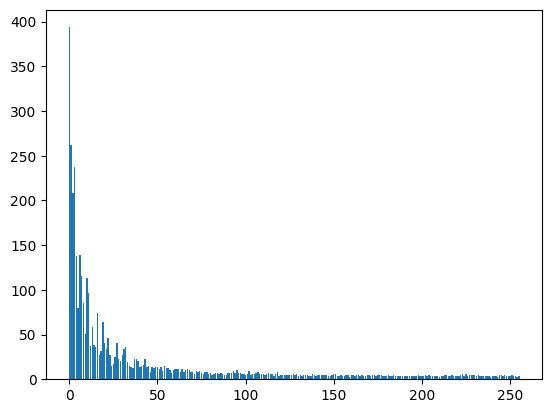

In [23]:
display_fs(ftest)

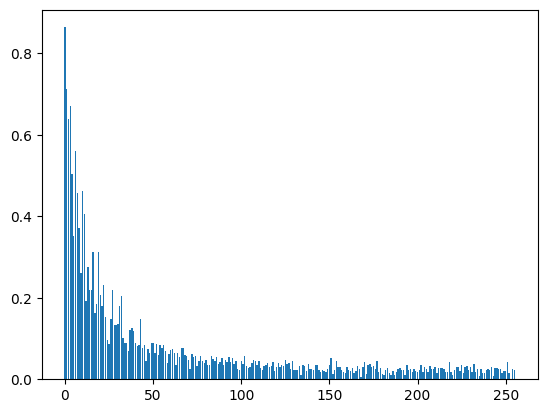

In [24]:
display_fs(mutalinfo)

# **Display Data Variables**

## **Dataset 1 - all features**

In [25]:
# # train
X_train_sclr
# # y_train
# # # validation
# X_valid_sclr
# # y_valid
# test
X_test_sclr
# # y_test

array([[-0.38329585, -0.0745134 ,  2.28204386, ..., -0.58467912,
         2.31874294,  0.58707187],
       [ 1.01757187, -0.23089371,  1.13855074, ..., -0.92458957,
         0.09658342, -0.85342378],
       [-0.2480288 ,  0.72267533,  1.7918923 , ..., -0.96629412,
        -0.28134897, -0.88134547],
       ...,
       [ 0.70050845,  1.03775828,  2.05915004, ...,  0.1869875 ,
         2.40403079,  1.28099342],
       [ 1.16027371, -0.04476956, -0.43265301, ..., -0.54440175,
         2.30138251, -0.66324491],
       [-0.54302595,  0.50710927,  0.63343217, ...,  0.10762815,
         1.23869156, -0.55119971]])

## **Dataset 2 - PCA**

In [26]:
# Dataset 2 - PCA
# train
X_train_pca
y_train
# validation
X_valid_pca
y_valid
# test
X_test_pca
y_test

image_path
n02089078-black-and-tan_coonhound\n02089078_376.jpg              14
n02112137-chow\n02112137_7616.jpg                               108
n02101556-clumber\n02101556_7509.jpg                             65
n02093428-American_Staffordshire_terrier\n02093428_10929.jpg     29
n02106382-Bouvier_des_Flandres\n02106382_2715.jpg                82
                                                               ... 
n02093991-Irish_terrier\n02093991_2973.jpg                       33
n02096437-Dandie_Dinmont\n02096437_3436.jpg                      43
n02112018-Pomeranian\n02112018_4928.jpg                         107
n02111277-Newfoundland\n02111277_2261.jpg                       104
n02105855-Shetland_sheepdog\n02105855_15602.jpg                  79
Name: target, Length: 8580, dtype: int64

### **Dataset 3 - PCA & Feature Selection**
* Please run this three times with different values of k.
  * k = 50
  * k = 100
  * k = 150
  * k = 200
* see which set gets the highest on the validation set

In [27]:
k = 200
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

In [28]:
# Dataset 3 - PCA & Feature Selection
# train
# X_train_pca_fs
# y_train
# # validation
# X_valid_pca_fs
# y_valid
# # test
X_test_pca_fs
# y_test

array([[ 6.63372287, -4.23018033, -0.93686639, ..., -0.55397983,
        -0.59206647, -0.07490894],
       [-2.9605076 ,  4.61274262, -3.14248285, ..., -0.30637552,
        -0.59326571, -0.21914962],
       [-1.17039105, -9.41079192,  1.29266881, ...,  0.4159786 ,
        -0.21808701,  0.04258984],
       ...,
       [-8.27566252, 11.03350791, -1.50366971, ..., -0.12144806,
        -0.3117871 ,  0.28957234],
       [-3.88203775, -2.61146249, -5.18436021, ..., -0.01522274,
         0.26003605, -0.16541093],
       [-0.02477311,  8.13514394, -2.01004158, ..., -0.19008995,
        -0.82496234, -0.48699816]])

# **Model 3: Multi-layer Perceptron (MLP)**


In [29]:
# %pip install torch

import time
import statistics
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Check PyTorch version and Apple Silicon support
print(torch.__version__)
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

2.2.2
True
True


In [30]:
# Prepare the data for MLP
# Convert the data to tensors for training

def load_data(X_train, X_test, X_valid, y_train, y_test, y_valid):
    # Training
    X_train_tensor = torch.tensor(X_train)
    y_train_tensor = torch.tensor(y_train)
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data)

    # Testing
    X_test_tensor = torch.tensor(X_test)
    y_test_tensor = torch.tensor(y_test)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_data)
    
    # Validation
    X_valid_tensor = torch.tensor(X_valid)
    y_valid_tensor = torch.tensor(y_valid)
    valid_data = TensorDataset(X_valid_tensor, y_valid_tensor)
    valid_loader = DataLoader(valid_data)
    
    # Print a summary of loaded data
    print("Data Summary:")
    print(f"Input features: {X_train.shape[1]}")
    print(f"Training data: {X_train_tensor.shape}, Training labels: {y_train_tensor.shape}")
    print(f"Validation data: {X_valid_tensor.shape}, Validation labels: {y_valid_tensor.shape}")
    print("-" * 50)
    
    return train_loader, valid_loader, test_loader

## Models
* **`MLP1_3HL`** - Default model, 3 hidden layers, default parameters -> to examine the effects of the number of features in the dataset
* **`MLP1_4HL`** - Default model, 4 hidden layers, default parameters -> to examine the effects of the number of hidden layers
* **`MLP2`** - Refined model, 4 hidden layers, increased neurons, dropout -> to examine the effects of the number of neurons in the hidden layers
* **`MLP3`** - Fine-tuned model, 4 hidden layers, increased neurons, dropout, grid search -> to find the best performing model

## Default model and parameters

In [31]:
# Default model, 3 hidden layers, default parameters
class MLP1_3HL(nn.Module):
    def __init__(self, input1, input2, input3, input4):
        super(MLP1_3HL, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3))
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer to prevent overfitting


        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  
        x = self.fc3(x)
        return x

In [32]:
class MLP1_4HL(nn.Module):
    def __init__(self, input1, input2, input3, input4, input5):
        super(MLP1_4HL, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3))
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.fc4 = nn.Linear(int(input4), int(input5))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer


        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)  
        x = self.fc4(x)
        return x

In [33]:
class MLP2(nn.Module):
    def __init__(self, input1, input2, input3, input4, input5):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3)) # Increase the number of neurons
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.fc4 = nn.Linear(int(input4), int(input5))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer

        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        return x

In [35]:
# Train the model
def train_model(model_loader, test_loader, validation_loader, num_epoch):
    # Summary of the model
    print('Training the model...')
    print(model)

    # Record the start time
    start_time = time.time()
    
    for epoch in range(num_epoch): # 10 epochs
        for i, (inputs, labels) in enumerate(model_loader):
            # Forward pass
            outputs = model(inputs.float())
            loss = criterion(outputs, labels) # Compute the loss
    
            # Zero the gradients
            optimizer.zero_grad()
            
            # Backward pass
            loss.backward()
            optimizer.step() # Update the weights
            
        scheduler.step()

        # Save the loss value

        # Calculate the confusion matrix and F1 score
        f1, cm = calculate_score(model, test_loader, model_name)
        
        # Evaluate on validation data and save the validation loss
        val_loss, val_accuracy = evaluate_model(model, validation_loader)
        tra_loss_values.append(loss.item())
        val_loss_values.append(val_loss)
        val_accuracy_values.append(val_accuracy)


        print(f'Epoch {epoch + 1}, Training Loss: {loss.item()}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%')
        
    end_time = time.time()
    used_time = end_time - start_time
        
    print('Finished Training')
    
    summarize_model(model, num_epoch, used_time, f1, cm)

In [36]:
from sklearn.metrics import confusion_matrix, f1_score

# Evaluate the model
def evaluate_model(model, valid_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_accuracy = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in valid_loader:
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs, 1)

            # Calculate loss    
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Calculate accuracy
            accuracy = accuracy_score(predicted.numpy(), labels.numpy())
            total_accuracy += accuracy

    avg_loss = total_loss / len(valid_loader)
    avg_accuracy = total_accuracy / len(valid_loader)
    
    return avg_loss, avg_accuracy

# Calculate the confusion matrix and F1 score
def calculate_score(model, train_loader, model_name):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in train_loader:
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
   
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    # Save the confusion matrix as a CSV file
    df_cm = pd.DataFrame(cm)
    df_cm.to_csv(f"output/{model_name}/cm-{model_name}.csv", index=False)
    
    return f1, cm

In [37]:
def summarize_model(model, num_epoch, used_time, f1, cm):
    # Summary of the model and save it as a txt file
    
    print("-" * 50)
    print("Model Summary:")
    print(model)

    # Loss function
    print("\nLoss function:")
    print(criterion)

    # Optimizer
    print("\nOptimizer:")
    print(optimizer)

    # Learning rate scheduler
    print("\nLearning Rate Scheduler:")
    print(scheduler)

    # Number of epochs
    print(f"\nNumber of Epochs: {num_epoch}")

    # Final training loss and validation loss
    print(f"\nFinal Training Loss: {tra_loss_values[-1]}")
    print(f"Final Validation Loss: {val_loss_values[-1]}")

    # Average validation loss and accuracy
    print(f"\nAverage Validation Loss: {statistics.mean(val_loss_values)}")

    # F1 score
    print(f"\nF1 Score: {f1}")

    # Confusion matrix
    print(f"\nConfusion Matrix: {cm}")

    # Total time taken for training
    print(f"\nTotal Training Time: {used_time // 60} minutes, {used_time % 60:.2f} seconds. That is {used_time:.2f} seconds.")
    
    # Save the summary
    with open(f"output/{model_name}/summary-{model_name}.txt", "w") as file:
        file.write("Model Summary:\n")
        file.write(str(model))
        file.write("\n\nLoss function:\n")
        file.write(str(criterion))
        file.write("\n\nOptimizer:\n")
        file.write(str(optimizer))
        file.write("\n\nLearning Rate Scheduler:\n")
        file.write(str(scheduler))
        file.write(f"\n\nNumber of Epochs: {num_epoch}")
        file.write(f"\n\nFinal Training Loss: {tra_loss_values[-1]}")
        file.write(f"\nFinal Validation Loss: {val_loss_values[-1]}")
        file.write(f"\n\nAverage Validation Loss: {statistics.mean(val_loss_values)}")
        file.write(f"\n\nF1 Score: {f1}")
        file.write(f"\n\nConfusion Matrix:\n{cm}")
        file.write(f"\n\nTotal Training Time: {used_time // 60} minutes, {used_time % 60:.2f} seconds. That is {used_time:.2f} seconds.")
    
    # Visualize the loss values and confusion matrix
    plot_learning_curve(tra_loss_values, val_loss_values, model_name)
    plot_confusion_matrix(cm)
    

In [38]:
# Export output data from each epoch
def export_output_data(model_name):
    # Create a DataFrame to store the output data
    output_data = pd.DataFrame({
        'Epoch': range(1, len(tra_loss_values) + 1),
        'Training Loss': tra_loss_values,
        'Validation Loss': val_loss_values,
        'Validation Accuracy': val_accuracy_values
    })
    
    # Save the output data to a CSV file
    output_data.to_csv(f"output/{model_name}/eva-{model_name}.csv", index=False)
    print(f"Output data saved as: {model_name}.csv")

In [39]:
# Visualize the loss values
# %pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_learning_curve(loss_values, val_loss_values, model_name):
    plt.clf()
    plt.plot(loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    
    # Display the x-axis labels every 5 epochs
    plt.xticks(range(0, len(loss_values), 5))
    
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"output/{model_name}/lc-{model_name}.pdf")
    plt.show()
    
def plot_confusion_matrix(cm):
    plt.clf()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig(f"output/cm-{model_name}.pdf")
    plt.show()

# Train the model

## 3HL vs 4HL with OG dataset and a Dropout layer

- 3 outperformed 4

In [40]:
train_loader, valid_loader, test_loader = load_data(X_train_sclr, X_valid_sclr, X_test_sclr, y_train, y_valid, y_test)
print(len(X_train_sclr), len(X_valid_sclr), len(X_test_sclr), len(y_train), len(y_valid), len(y_test))

print(len(X_train_pca), len(X_valid_pca), len(X_test_pca), len(y_train), len(y_valid), len(y_test))

Data Summary:
Input features: 512
Training data: torch.Size([10200, 512]), Training labels: torch.Size([10200])
Validation data: torch.Size([8580, 512]), Validation labels: torch.Size([8580])
--------------------------------------------------
10200 1800 8580 10200 1800 8580
10200 1800 8580 10200 1800 8580


/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

In [ ]:
k = 512
iterations = 50
hl = 3

model_name = f"default-{hl}hl-{k}features-{iterations}epochs"
os.mkdir(f"output/{model_name}")

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_3HL(512, 256, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
# train_loader, valid_loader = load_data(X_train_pca_fs, X_valid_pca_fs, y_train, y_valid)    # Using PCA & feature selection
# train_loader, valid_loader = load_data(X_train_pca, X_valid_pca, y_train, y_valid)    # Using PCA
train_loader, test_loader, valid_loader = load_data(X_train_sclr, X_test, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model

# Export the output data
export_output_data(f"{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

In [ ]:
k = 512
iterations = 50
hl = 4

model_name = f"default-{hl}hl-{k}features-{iterations}epochs"
os.mkdir(f"output/{model_name}")

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(512, 256, 192, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
# train_loader, valid_loader = load_data(X_train_pca_fs, X_valid_pca_fs, y_train, y_valid)    # Using PCA & feature selection
# train_loader, valid_loader = load_data(X_train_pca, X_valid_pca, y_train, y_valid)    # Using PCA
train_loader, test_loader, valid_loader = load_data(X_train_sclr, X_test, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model

# Export the output data
export_output_data(f"{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

## Using 3-layer Model (MLP1-3HL) to train different datasets (All features, PCA, PCA & Feature Selection with k=200)

In [ ]:
k = 256
iterations = 50
hl = 3

model_name = f"default-{hl}hl-{k}features-{iterations}epochs"
os.mkdir(f"output/{model_name}")

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_3HL(256, 192, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
# train_loader, test_loader, valid_loader = load_data(X_train_pca_fs, X_train_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)    # Using PCA & feature selection
train_loader, test_loader, valid_loader = load_data(X_train_pca, X_test_pca, X_valid_pca, y_train, y_test, y_valid)    # Using PCA
# train_loader, test_loader, valid_loader = load_data(X_train_sclr, X_test_sclr, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model

# Export the output data
export_output_data(f"{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

In [ ]:
# Feature selection
k = 200
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

iterations = 50
hl = 3

model_name = f"default-{hl}hl-{k}features-{iterations}epochs"
os.mkdir(f"output/{model_name}")

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_3HL(200, 192, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, test_loader, valid_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)    # Using PCA and feature selection
# train_loader, test_loader, valid_loader = load_data(X_train_pca, X_test_pca, X_valid_pca, y_train, y_test, y_valid)    # Using PCA
# train_loader, test_loader, valid_loader = load_data(X_train_sclr, X_test_sclr, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model

# Export the output data
export_output_data(f"{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

In [49]:
# Grid Search for the best performing model -> MLP3
# Fine-tuning the model

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [ (360, ), ],  # Different numbers of neurons in the hidden layer
    'activation': ['tanh'],  # Different activation functions
    'alpha': [0.0001],  # Different values for regularization parameter
    'solver': ['adam']  # Different solvers
    'max_iter': [500]  # Maximum number of iterations
}

# Create the MLPClassifier
mlp = MLPClassifier(max_iter=500, early_stopping=True)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca_fs, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

ValueError: Invalid parameter 'max_epochs' for estimator MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(360,),
              max_iter=500). Valid parameters are: ['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

# **Results**
1. Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (250,)}; Best score: 0.7338422739279714
2. Best parameters: {'hidden_layer_sizes': (300,)}; Best score: 0.7330888548424352
3. Best parameters: {'hidden_layer_sizes': (350,)}; Best score: 0.7363960427823245
4. Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (360,)}; Best score: 0.7424333194414288
5. Best parameters: {'hidden_layer_sizes': (360,)}; Best score: 0.735122430498741
6. Best parameters: {'hidden_layer_sizes': (360,)}; Best score: 0.7365260318411916
7. Best parameters: {'hidden_layer_sizes': (360,)}; Best score: 0.7402995114413866

In [41]:
# Fine-tuned model, 1 hidden layers, increased neurons, dropout, grid search
# Default model, 3 hidden layers, default parameters
import torch.nn as nn

class MLP_1HL(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP_1HL, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer with dropout rate = 0.5
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.dropout(x)  # Apply dropout after the activation function
        x = self.fc2(x)
        return x

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_35226/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 200
Training data: torch.Size([10200, 200]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 200]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP_1HL(
  (fc1): Linear(in_features=200, out_features=360, bias=True)
  (tanh): Tanh()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=360, out_features=120, bias=True)
)
Epoch 1, Training Loss: 0.3733774721622467, Validation Loss: 1.6537850429783716, Validation Accuracy: 56.07226107226108%
Epoch 2, Training Loss: 0.662343442440033, Validation Loss: 1.539486105303635, Validation Accuracy: 56.75990675990676%
Epoch 3, Training Loss: 0.7913593649864197, Validation Loss: 1.4867391027509624, Validation Accuracy: 58.27505827505828%
Epoch 4, Training Loss: 0.8355098962783813, Validation Loss: 1.4465997922283627, Validation Accuracy: 59.09090909090909%
Epoch 5, Training Loss: 0.895001232624054, Validation Loss

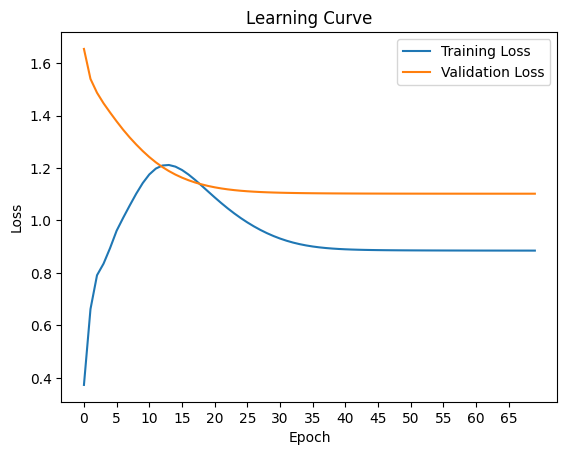

<Figure size 640x480 with 0 Axes>

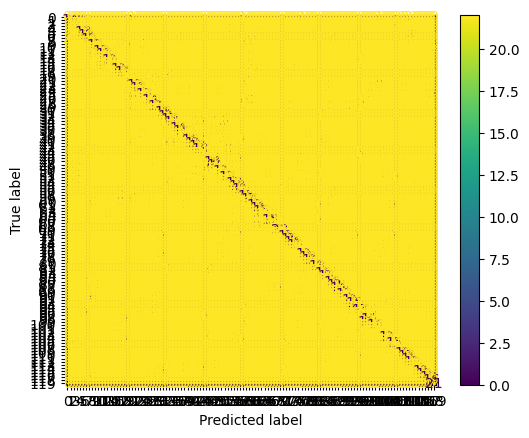

Output data saved as: tanh-1hl-200features-70epochs.csv
Model saved as: f'tanh-1hl-200features-70epochs.pth'


In [56]:
# Feature selection
k = 200
iterations = 70
hl = 1

model_name = f"tanh-{hl}hl-{k}features-{iterations}epochs"
os.mkdir(f"output/{model_name}")

# Create an instance of the model, and define the loss function and optimizer
model = MLP_1HL(input_size=200, hidden_size=360, output_size=120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, test_loader, valid_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)    # Using PCA and feature selection

train_model(train_loader, test_loader, valid_loader, iterations)
# Save the model

# Export the output data
export_output_data(f"{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

In [ ]:
#TODO: Extract the top 10 breeds that are best/worst predicted by the model and generate a Confusion Matrix from it